Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font>

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [ ]:
!pip install nbimporter
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [ ]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks.
import nbimporter
import pandas as pd

# **Summary of what we have to do and in which section we have to put our code:**

1. Look for correlation and create new df 'cleaned_df' [collaborator 3] -> section 1
2. Rename vars [collaborator 1] -> section 1
3. Remove column 'name' and substitute it with columns 'subject_id' and 'trial' (that became multi-index) [collaborator 2] -> section 1
4. Summarize data with cleaned_df [collaborator 1] -> section 2
5. Create df with function group_and_average (using cleaned_dataframe) [collaborator 1] -> section 3
6. classify data into patients or controls using k=3. [collaborator 3] -> section 3

Order of the df:
* df -> original
* cleaned_df -> deleted correlated variables
* renamed_df -> rename variables + 'subject_id' and 'trial'

Functions to call from Collaborator coding (different files):
* renamevars(df, dict_names)
* scat_plt(var1, var2, groups)
* normalize(df, op)
* group_and_average(df, gv)

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work.
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


**df**

In [ ]:
# We will start by loading the parkinson dataset.
df = pd.read_csv('parkinsons.data',
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

Look for correlation and create new df 'cleaned_df' [collaborator 3] -> section 1

First Graphically

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pandas.api.types import is_numeric_dtype

# CALL scat_plt
from scat_plt import scat_plt

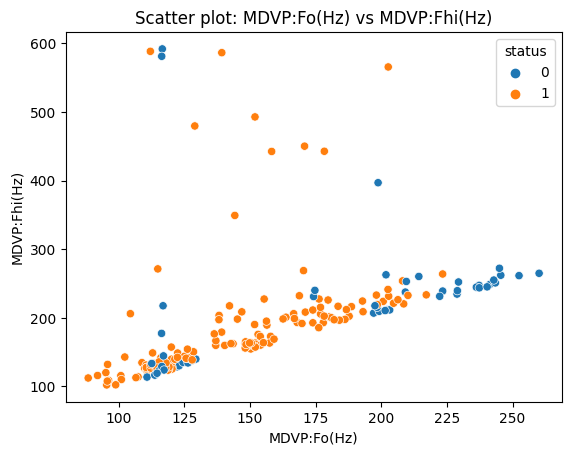

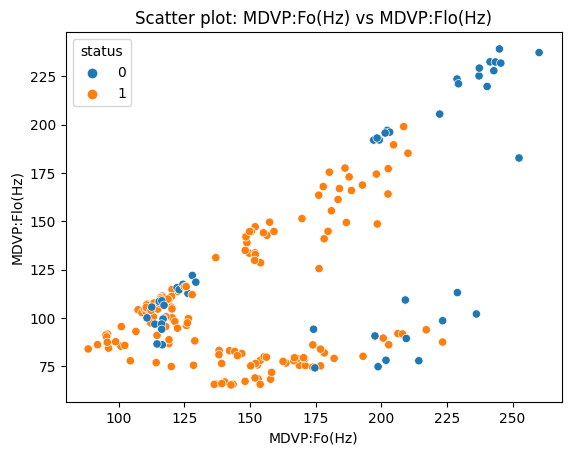

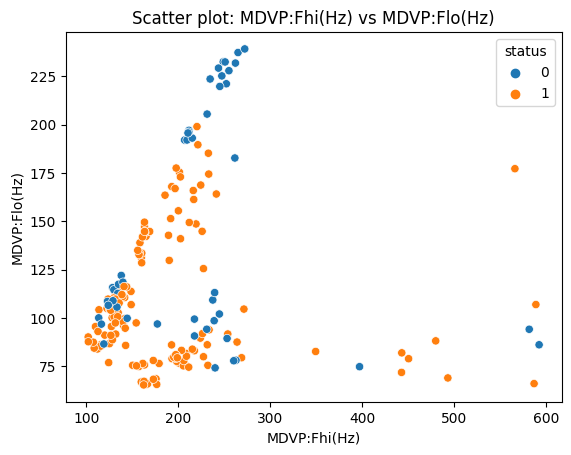

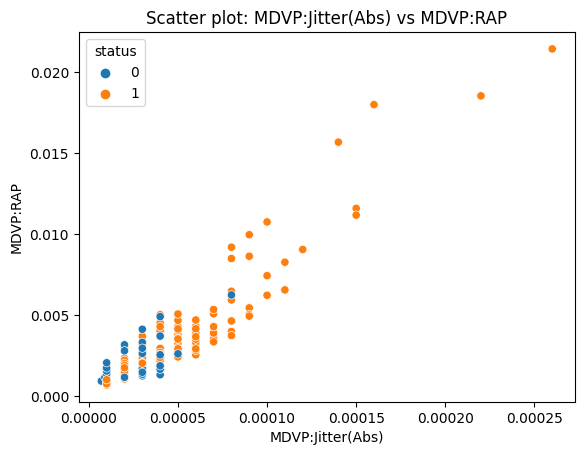

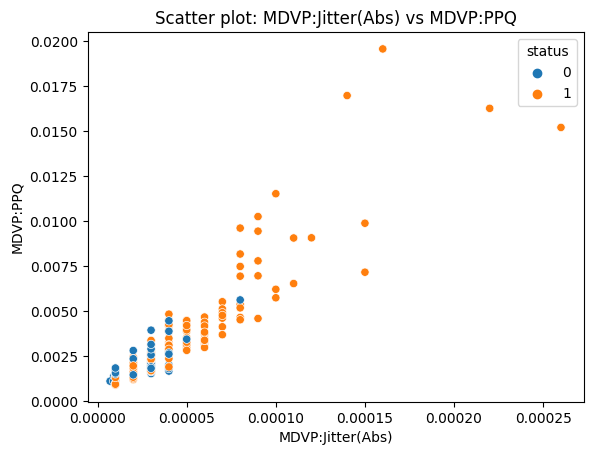

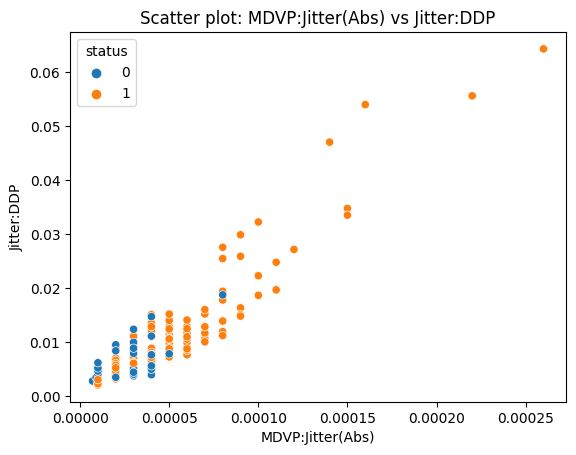

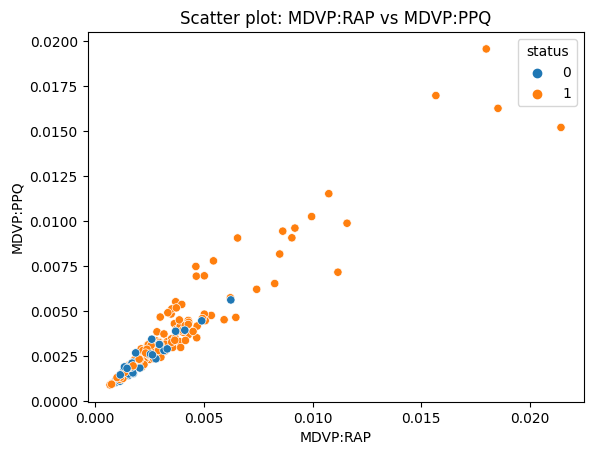

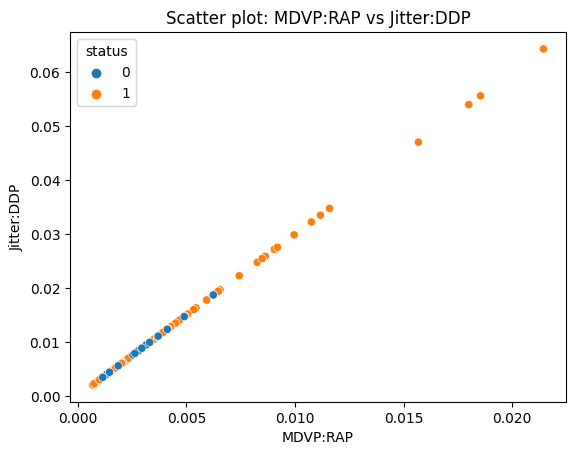

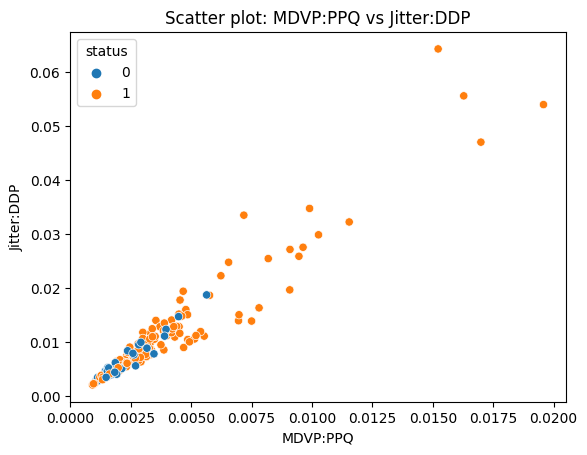

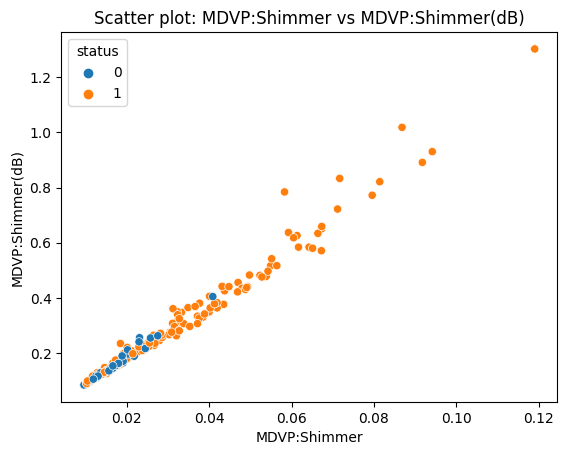

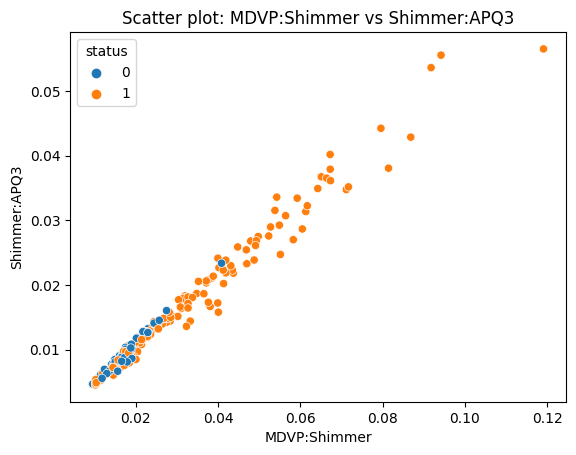

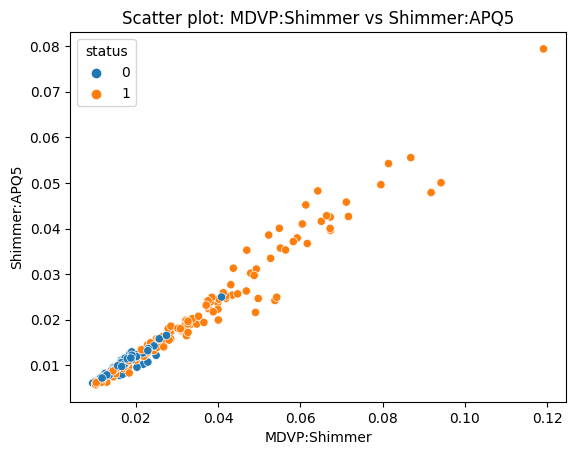

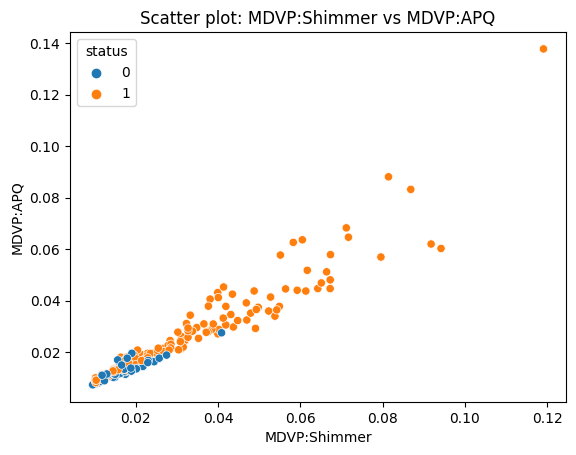

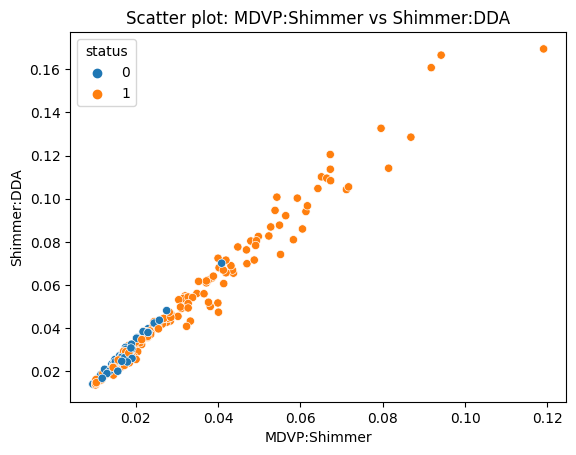

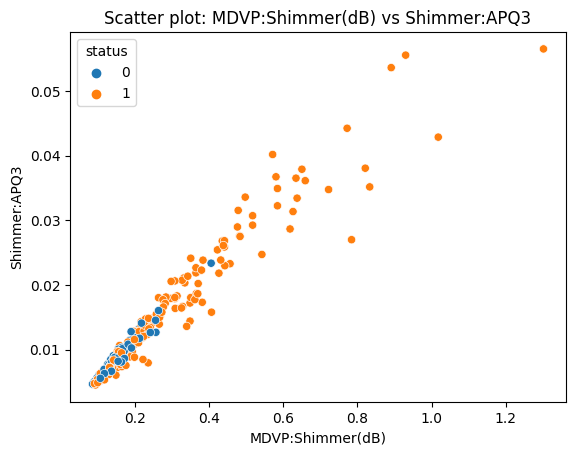

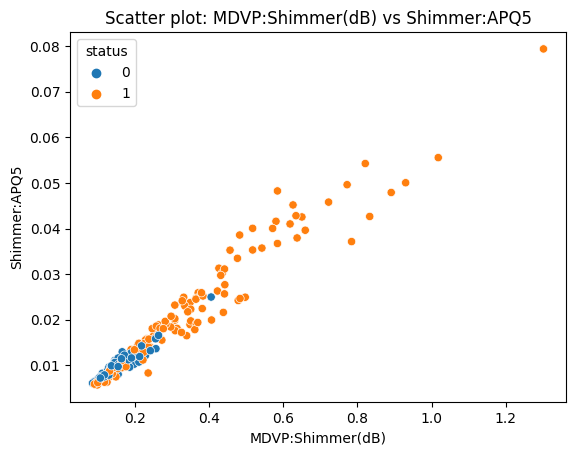

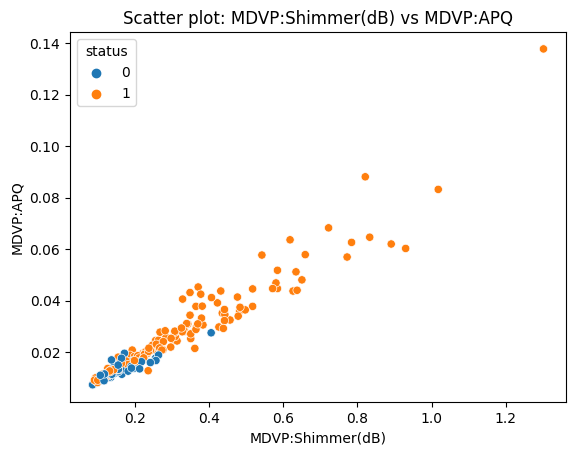

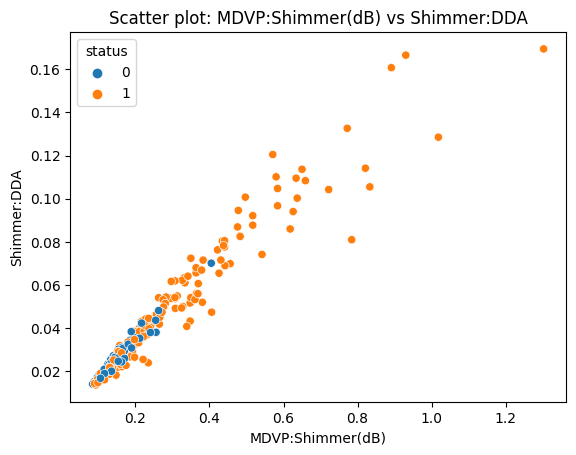

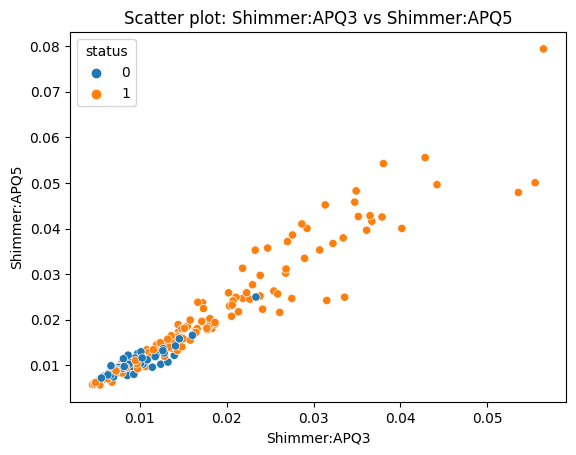

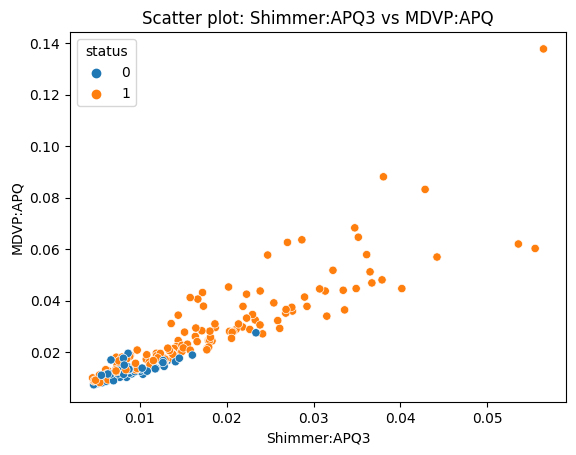

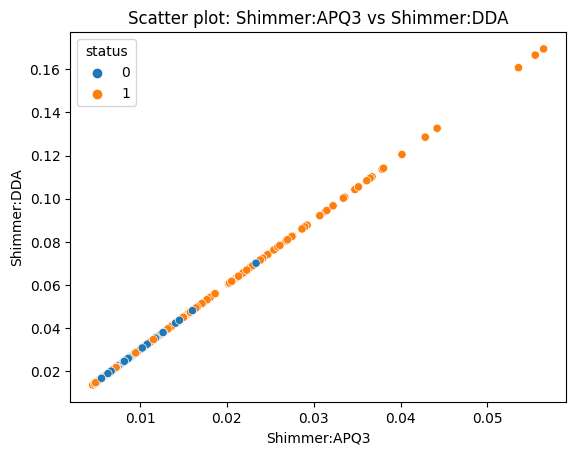

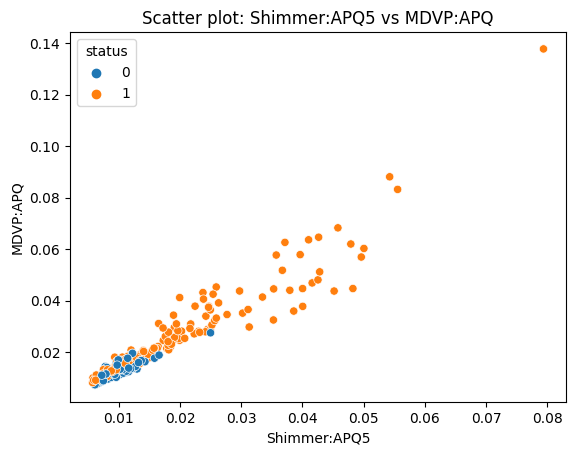

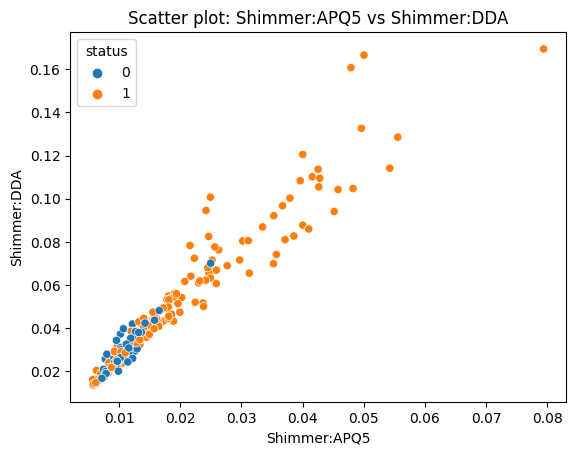

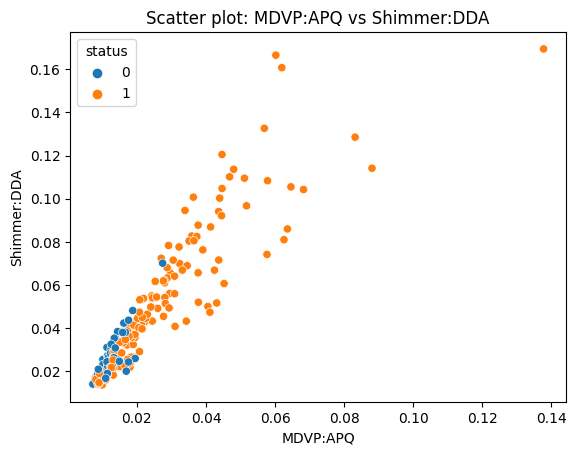

In [ ]:
import itertools

# Obté les columnes numèriques
numeric_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
numeric_df = df[numeric_cols]

# Crea combinacions de columnes
column_combinations = list(itertools.combinations(numeric_df.columns, 2))

# Genera scatter plots per a cada combinació
for combination in column_combinations:
    scat_plt(df,numeric_df[combination[0]], numeric_df[combination[1]],'status')
    plt.xlabel(combination[0])
    plt.ylabel(combination[1])
    plt.title(f'Scatter plot: {combination[0]} vs {combination[1]}')
    plt.show()

# Obté les columnes numèriques
numeric_cols = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ','Jitter:DDP']
numeric_df = df[numeric_cols]

# Crea combinacions de columnes
column_combinations = list(itertools.combinations(numeric_df.columns, 2))

# Genera scatter plots per a cada combinació
for combination in column_combinations:
    scat_plt(df,numeric_df[combination[0]], numeric_df[combination[1]],'status')
    plt.xlabel(combination[0])
    plt.ylabel(combination[1])
    plt.title(f'Scatter plot: {combination[0]} vs {combination[1]}')
    plt.show()

# Obté les columnes numèriques
numeric_cols = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3','Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']
numeric_df = df[numeric_cols]

# Crea combinacions de columnes
column_combinations = list(itertools.combinations(numeric_df.columns, 2))

# Genera scatter plots per a cada combinació
for combination in column_combinations:
    scat_plt(df,numeric_df[combination[0]], numeric_df[combination[1]],'status')
    plt.xlabel(combination[0])
    plt.ylabel(combination[1])
    plt.title(f'Scatter plot: {combination[0]} vs {combination[1]}')
    plt.show()

Second Numerically

In [ ]:
import numpy as np

# Crea un nou df amb la llista de columnes que volem conservar
columnas_a_mantener = [
    'MDVP:Fo(Hz)',
    'MDVP:Fhi(Hz)',
    'MDVP:Flo(Hz)',
    'MDVP:Jitter(Abs)',
    'MDVP:RAP',
    'MDVP:PPQ',
    'Jitter:DDP',
    'MDVP:Shimmer',
    'MDVP:Shimmer(dB)',
    'Shimmer:APQ3',
    'Shimmer:APQ5',
    'MDVP:APQ',
    'Shimmer:DDA'
]
df_filtrado = df[columnas_a_mantener]

#obtain the correlation matrix
correlation_matrix = df_filtrado.corr().abs()

# Get the list of columns with over 99% correlation
high_correlation_cols = np.where(correlation_matrix > 0.9)

# Filter unique columns and avoid self-comparisons
unique_high_correlation_cols = set()
for i, j in zip(*high_correlation_cols):
    if i != j and (j, i) not in unique_high_correlation_cols:
        unique_high_correlation_cols.add((i, j))

# Print to see the colums and their correlations
for col1, col2 in unique_high_correlation_cols:
    correlation_value = correlation_matrix.iloc[col1, col2]
    print(f"Columns {df_filtrado.columns[col1]} and {df_filtrado.columns[col2]} have correlation > 99%: {correlation_value:.4f}")

Columns Shimmer:APQ3 and Shimmer:APQ5 have correlation > 99%: 0.9601
Columns Shimmer:APQ5 and MDVP:APQ have correlation > 99%: 0.9491
Columns MDVP:Jitter(Abs) and MDVP:RAP have correlation > 99%: 0.9229
Columns MDVP:Shimmer and Shimmer:APQ5 have correlation > 99%: 0.9828
Columns MDVP:RAP and Jitter:DDP have correlation > 99%: 1.0000
Columns MDVP:Shimmer(dB) and Shimmer:APQ5 have correlation > 99%: 0.9738
Columns Shimmer:APQ3 and Shimmer:DDA have correlation > 99%: 1.0000
Columns MDVP:Shimmer and Shimmer:APQ3 have correlation > 99%: 0.9876
Columns MDVP:Shimmer(dB) and Shimmer:DDA have correlation > 99%: 0.9632
Columns MDVP:RAP and MDVP:PPQ have correlation > 99%: 0.9573
Columns MDVP:Shimmer(dB) and Shimmer:APQ3 have correlation > 99%: 0.9632
Columns MDVP:Shimmer and Shimmer:DDA have correlation > 99%: 0.9876
Columns MDVP:PPQ and Jitter:DDP have correlation > 99%: 0.9573
Columns MDVP:Jitter(Abs) and Jitter:DDP have correlation > 99%: 0.9229
Columns MDVP:Shimmer(dB) and MDVP:APQ have corr

We have considered eliminating one of the columns in cases where there is more than 99% correlation. It can be seen that MDVP:RAP and Jitter:DDP and Shimmer:APQ3 and Shimmer:DDA have a correlation of 1 (straight line in the graph). We will delete the MDVP:RAP and the Shimmer:APQ3.

**cleaned_df**

In [ ]:
cleaned_df = df.drop(['Shimmer:APQ3','MDVP:RAP'], axis=1)
cleaned_df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Rename variables [collaborator 1] -> section 1

Now we will modify the names of the columns to more easily manage the data

In [ ]:
# Call renamevars

from renamevars import renamevars

**renamed_df**

In [ ]:
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF',
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}

renamed_df = renamevars(cleaned_df,dict_names)
renamed_df

,name,avFF,maxFF,minFF,MDVP:Jitter(%),absJitter,ppq,ddp,lShimer,dbShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Remove column 'name' and substitute it with columns 'subject_id' and 'trial' (that became multi-index) [collaborator 2] -> section

In [ ]:
renamed_df['subject_id'] = renamed_df['name'].apply(lambda x: x.split('_')[2])
renamed_df['trial'] = renamed_df['name'].apply(lambda x: x.split('_')[3])

# Remove the 'name' column
renamed_df = renamed_df.drop(columns=['name'])

# Reorder columns, moving 'subject_id' and 'trial' to the beginning
column_order = ['subject_id', 'trial'] + [col for col in renamed_df.columns if col not in ['subject_id', 'trial']]
renamed_df = renamed_df[column_order]

renamed_df

,subject_id,trial,avFF,maxFF,minFF,MDVP:Jitter(%),absJitter,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,S50,2,174.188,230.978,94.261,0.00459,0.00003,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,S50,3,209.516,253.017,89.488,0.00564,0.00003,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,S50,4,174.688,240.005,74.287,0.01360,0.00008,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,S50,5,198.764,396.961,74.904,0.00740,0.00004,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### 2. Basic EDA based on plots and descriptive statistics

Summarize data with cleaned_df [collaborator 1] -> section 2

Number of Observations: 195
Status 0: 147
Status 1: 48
 
Summary Statistics:

Group: trial

                trial                  
                 mean       std max min
status                                 
1       8.398376e+143  1.767283   7   1
0        2.572003e+45  1.725898   6   1


Group: avFF

              avFF                             
              mean        std      max      min
status                                         
1       145.180762  32.348050  223.361   88.333
0       181.937771  52.731067  260.105  110.739


Group: maxFF

             maxFF                             
              mean        std      max      min
status                                         
1       188.441463  88.339180  588.518  102.145
0       223.636750  96.727067  592.030  113.597


Group: minFF



<ipython-input-27-eef55d165f6e>:22: FutureWarning: ['subject_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats = grouped_data.agg(['mean', 'std', 'max', 'min'])


             minFF                           
              mean        std     max     min
status                                       
1       106.893558  32.274358  199.02  65.476
0       145.207292  58.757070  239.17  74.287


Group: MDVP:Jitter(%)

       MDVP:Jitter(%)                            
                 mean       std      max      min
status                                           
1            0.006989  0.005240  0.03316  0.00168
0            0.003866  0.002055  0.01360  0.00178


Group: absJitter

       absJitter                             
            mean       std      max       min
status                                       
1       0.000051  0.000037  0.00026  0.000010
0       0.000023  0.000015  0.00008  0.000007


Group: ppq

             ppq                            
            mean       std      max      min
status                                      
1       0.003900  0.002998  0.01958  0.00092
0       0.002056  0.000943  0.00564  0.00106


Grou

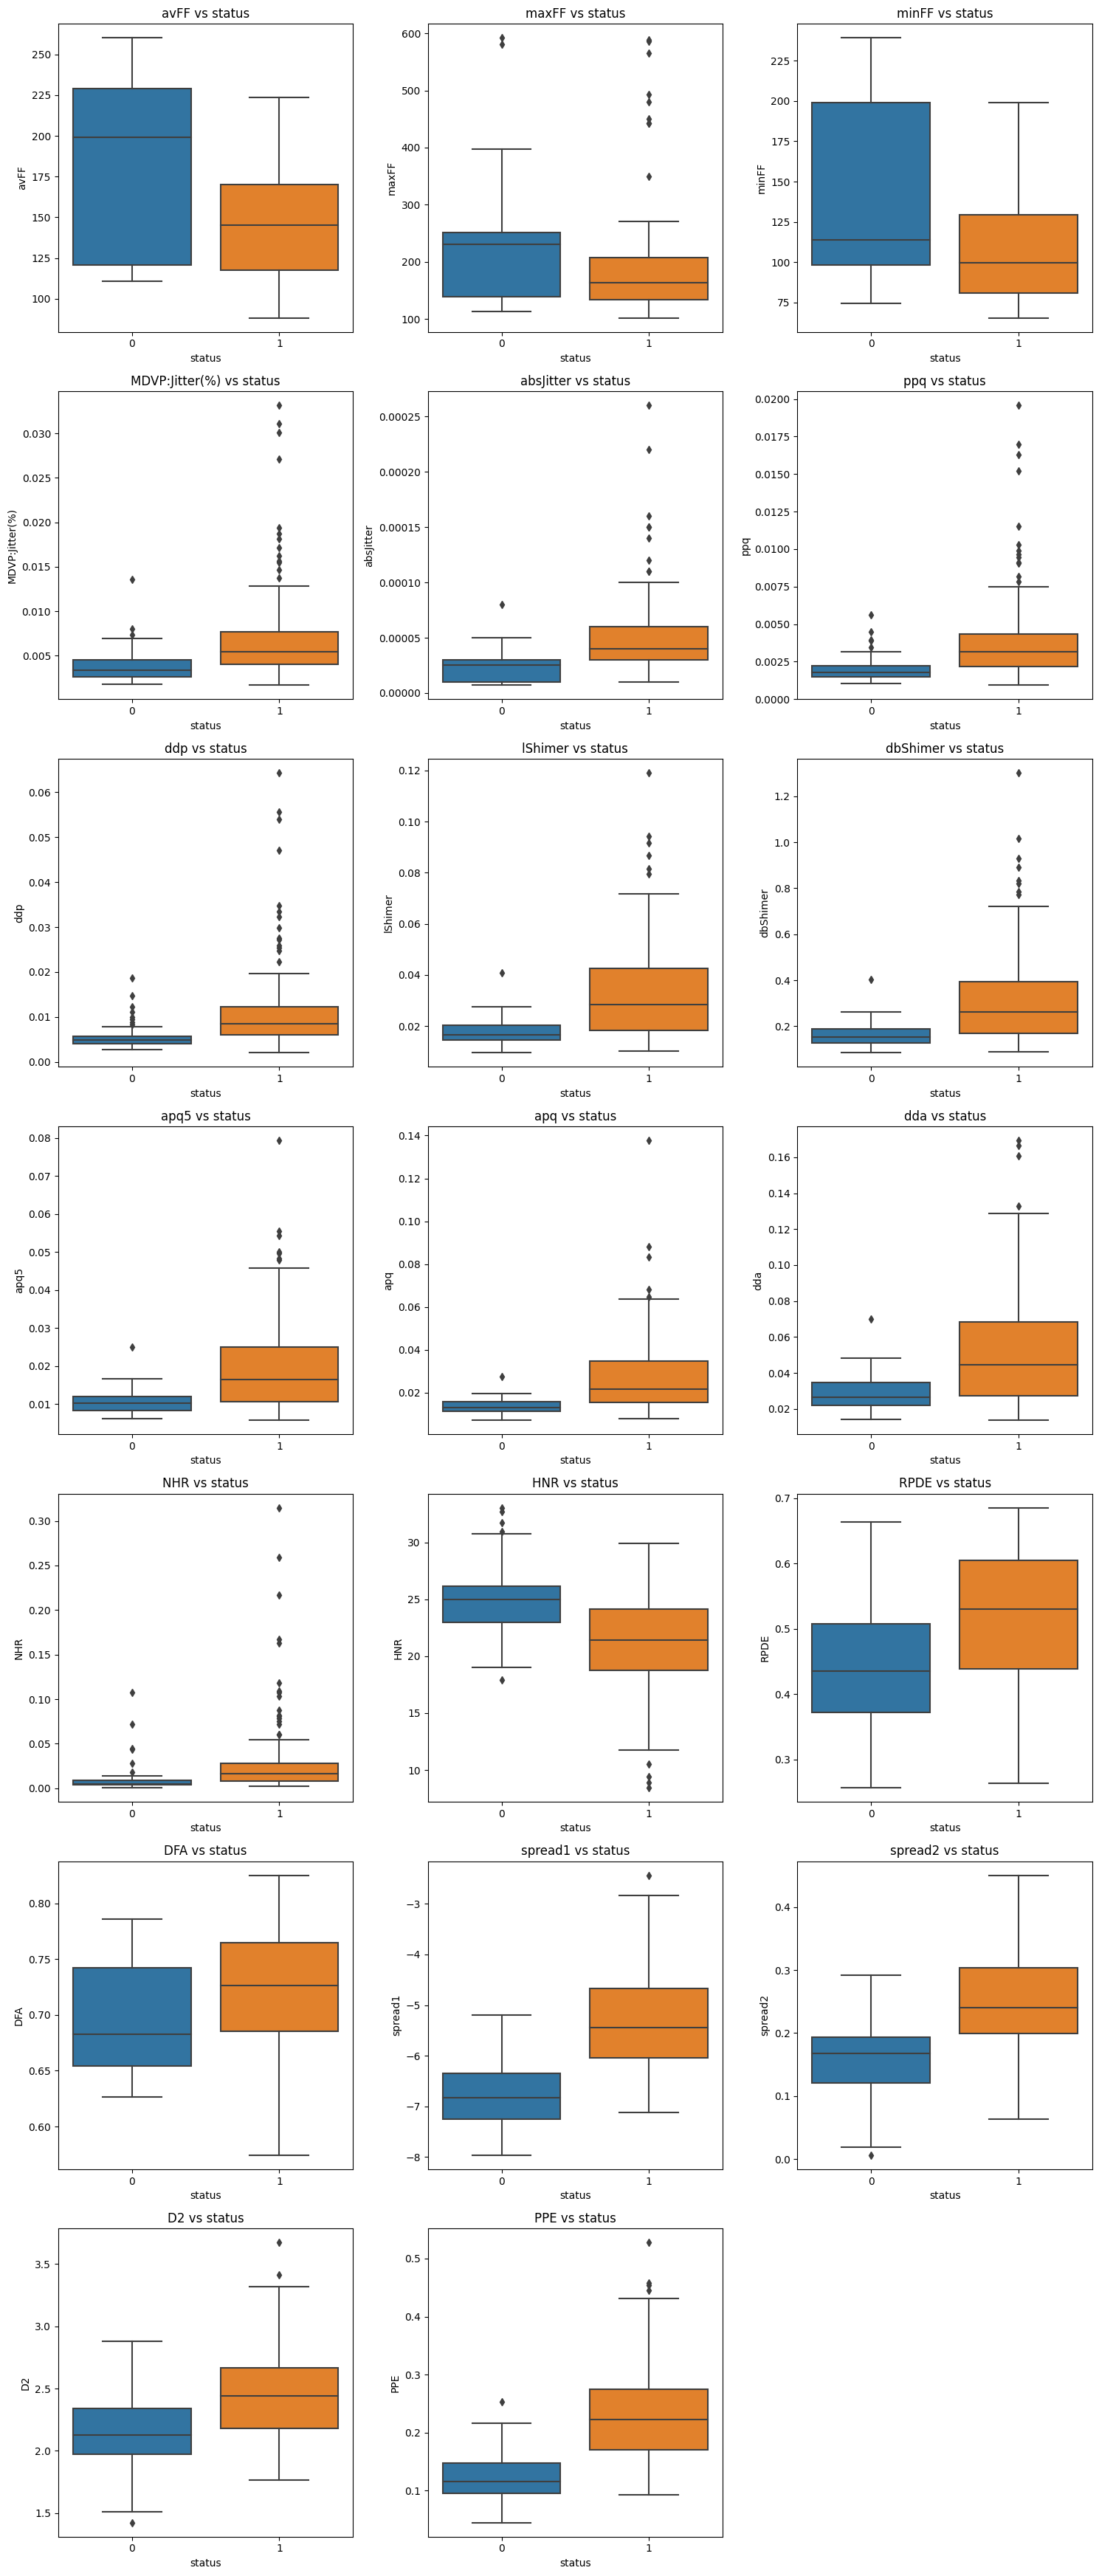

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pandas.api.types import is_numeric_dtype

def obtain_info(renamed_df):
    # 1. Calculate the Number of Observations
    num_observations = len(renamed_df)
    print("Number of Observations:", num_observations)
    # Suponiendo que la columna que contiene el "status" se llama "status"
    status_counts = renamed_df['status'].value_counts()
    # Imprimir la cantidad de observaciones para cada estado
    print("Status 0:", status_counts.get(0, 0))
    print("Status 1:", status_counts.get(1, 0))
    print(" ")

    # 2. Examine Differences between Controls and Patients
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    grouped_data = renamed_df.groupby('status', sort=False)
    summary_stats = grouped_data.agg(['mean', 'std', 'max', 'min'])
    print("Summary Statistics:")
    for group_name, group_data in summary_stats.groupby(level=0, axis=1, sort=False):
        print(f"\nGroup: {group_name}\n")
        print(group_data)
        print()
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')


    # 4. Identify Outliers and Decide on Treatment
    # Boxplot for each variable
    label_encoder = LabelEncoder()
    cleaned_df['status'] = label_encoder.fit_transform(renamed_df['status'])
    # Filter numeric columns excluding 'status'
    numeric_columns = [column for column in renamed_df.columns if column != 'status' and is_numeric_dtype(renamed_df[column])]
    # Calculate the number of rows needed
    num_columns = len(numeric_columns)
    num_rows = (num_columns + 2) // 3
    # Adjust subplots layout
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    # Remove empty subplots if there are fewer than 3 columns
    for i in range(num_columns, num_rows * 3):
        fig.delaxes(axes.flatten()[i])
    # Iterate over numeric columns and create boxplots
    for i, column in enumerate(numeric_columns):
        row_index = i // 3
        col_index = i % 3
        ax = axes[row_index, col_index]
        sns.boxplot(x='status', y=column, data=renamed_df, ax=ax)
        ax.set_title(f'{column} vs status')

    plt.tight_layout()
    plt.show()

plots_info = obtain_info(renamed_df)
plots_info

We can see that there are significantly more patients without Parkinson's (147) than with Parkinson's (48).

An appreciable difference between control and patients can be observed in general, as the values of the columns in Parkinson's patients are generally higher (excluding "MinFF," "MaxFF," "avFF," and "HNR").

The variability of the data, when comparing it between both groups, appears to be proportional to the mean in most columns. The group with a higher mean typically exhibits a higher standard deviation by a roughly equivalent factor. However, there are some columns where this trend is not as consistent, such as "apq," "ppq," "dda," "dbShimer," and "lShimer," where Group "1" (with parkinson) demonstrates significantly more variability.

After seeing the plots and the max and min values, we decided that there are outliners and we have to remove the them using our "remove_outliers" function. However, we later noticed that if we removed the outliers, the accuracy of the K-neighbors decreased from 0.88, 0.88, and 0.84 to 0.84, 0.88, and 0.81, respectively, for each scenario. Because of this we chose to keep all the outliers.

In [ ]:
## CODE TO ELIMINATE OUTLIERS

def remove_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

# Assuming 'renamed_df' is your DataFrame
#numeric_columns = renamed_df.select_dtypes(include=['number']).columns

# Apply the remove_outliers function to numeric columns based on 'status' groups
#renamed_df[numeric_columns] = renamed_df.groupby('status')[numeric_columns].apply(remove_outliers).reset_index(drop=True)

# Display the resulting DataFrame
#renamed_df

### 3. Aggregating and transforming variables in the dataset

Create df with function group_and_average (using cleaned_dataframe) [collaborator 1] -> section 3

In [ ]:
# CALL group_and_average

from group_and_average import group_and_average

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
renamed_df['status'] = label_encoder.fit_transform(renamed_df['status'])
# Extract the 'Sxx' prefix from the 'name' column
renamed_df['subject_id'] = renamed_df['subject_id'].str.extract(r'(S\d+)')

# Utilizamos la función para agrupar y calcular la media
grouped_and_averaged = group_and_average(renamed_df, 'subject_id')

# Imprimimos el resultado
grouped_and_averaged['status'] = pd.cut(grouped_and_averaged['status'], bins=[0, 0.5,1], labels=[0,1], include_lowest=True)
grouped_and_averaged

<ipython-input-29-ed17ba48c371>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  av_df = df.groupby(gv).mean().reset_index()


,subject_id,avFF,maxFF,minFF,MDVP:Jitter(%),absJitter,ppq,ddp,lShimer,dbShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,118.719333,141.312833,106.029833,0.010085,0.000087,0.007312,0.014992,0.053932,0.515167,...,0.084073,0.016318,20.406667,1,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,S02,99.770333,121.894333,95.413167,0.004585,0.000050,0.002857,0.006978,0.021668,0.194333,...,0.033125,0.008917,22.997333,1,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,S04,147.346167,216.867500,87.532333,0.004347,0.000030,0.002320,0.005285,0.019343,0.181667,...,0.028148,0.013080,23.899667,1,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,S05,159.837667,181.630167,86.767167,0.006247,0.000040,0.003422,0.009188,0.043337,0.388167,...,0.061477,0.025608,19.058667,1,0.626723,0.695886,-4.560947,0.278483,2.787869,0.310658
4,S06,150.644667,208.264333,78.278333,0.005230,0.000037,0.002838,0.008173,0.021367,0.209667,...,0.029023,0.014892,24.762000,1,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939
5,S07,200.266833,210.884333,194.366167,0.002163,0.000010,0.001282,0.003523,0.010803,0.095667,...,0.016148,0.001495,30.992167,0,0.395578,0.741482,-7.589537,0.173049,1.795701,0.068113
6,S08,182.032500,196.059833,170.768167,0.003227,0.000018,0.001882,0.005297,0.016737,0.151000,...,0.025815,0.003183,25.748333,1,0.355864,0.768637,-6.384376,0.193017,2.400193,0.147991
7,S10,243.814333,254.280500,222.115000,0.002390,0.000009,0.001487,0.003850,0.015308,0.137000,...,0.025922,0.005422,24.614667,0,0.451700,0.638251,-7.105562,0.129853,2.298465,0.098390
8,S13,125.546333,134.313167,116.898833,0.004595,0.000035,0.001738,0.004335,0.020510,0.186167,...,0.034442,0.005365,24.736500,0,0.509845,0.762657,-6.695058,0.261352,2.100401,0.123182
9,S16,113.014000,154.201333,105.652667,0.008043,0.000072,0.005035,0.010527,0.029677,0.288667,...,0.048467,0.009658,21.716167,1,0.542488,0.816804,-4.519291,0.239992,1.934123,0.325605


Classify data into patients or controls using k=3. [collaborator 3] -> section 3

In [ ]:
# CALL normalize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from normalize import normalize

z_scored = normalize(grouped_and_averaged, 0)
z_scored

,subject_id,avFF,maxFF,minFF,MDVP:Jitter(%),absJitter,ppq,ddp,lShimer,dbShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,-0.871842,-0.879562,-0.276580,0.936088,1.398039,1.623259,0.673239,1.495820,1.400080,...,1.433560,-0.231455,-0.377004,1,-0.738285,1.953532,1.528735,1.050513,-0.093930,1.874259
1,S02,-1.341992,-1.193896,-0.563244,-0.374209,0.203722,-0.228628,-0.368368,-0.472427,-0.499845,...,-0.514440,-0.446817,0.251716,1,1.064727,1.134122,0.291882,1.217419,-0.271149,0.362142
2,S04,-0.161571,0.343471,-0.776036,-0.430989,-0.447723,-0.451714,-0.588475,-0.614265,-0.574855,...,-0.704722,-0.325679,0.470700,1,0.250237,-1.367303,0.378984,0.357614,-0.036167,0.336749
3,S05,0.148360,-0.226929,-0.796697,0.021659,-0.122001,0.006235,-0.081103,0.849465,0.648006,...,0.569581,0.038850,-0.704145,1,1.364914,-0.420238,1.192387,0.783052,1.335125,1.329299
4,S06,-0.079731,0.204209,-1.025906,-0.220547,-0.230575,-0.236249,-0.213037,-0.490830,-0.409044,...,-0.671266,-0.272966,0.679977,1,-0.693344,0.029986,-0.549588,0.051703,0.219718,-0.509631
5,S07,1.151462,0.246620,2.108615,-0.951137,-1.110026,-0.883336,-0.817464,-1.135254,-1.084134,...,-1.163540,-0.662761,2.191955,0,-1.087441,0.442697,-1.980810,-0.753403,-1.849453,-1.731540
6,S08,0.699044,0.006650,1.471439,-0.697813,-0.827733,-0.633923,-0.586958,-0.773287,-0.756459,...,-0.793937,-0.613636,0.919347,1,-1.508795,0.956599,-0.718106,-0.462415,0.090792,-0.723502
7,S10,2.231934,0.949090,2.857869,-0.897137,-1.126313,-0.798120,-0.775002,-0.860423,-0.839364,...,-0.789858,-0.548509,0.644221,0,-0.492009,-1.510981,-1.473727,-1.382879,-0.235726,-1.349455
8,S13,-0.702454,-0.992868,0.016897,-0.371827,-0.284862,-0.693505,-0.711960,-0.543092,-0.548207,...,-0.464098,-0.550158,0.673789,0,0.124888,0.843441,-1.043622,0.533412,-0.871452,-1.036590
9,S16,-1.013399,-0.670930,-0.286764,0.449690,0.909455,0.676877,0.092859,0.016127,0.058782,...,0.072146,-0.425237,-0.059206,1,0.471215,1.868182,1.236032,0.222138,-1.405158,1.517929


In [ ]:
min_max = normalize(grouped_and_averaged, 1)
min_max

,subject_id,avFF,maxFF,minFF,MDVP:Jitter(%),absJitter,ppq,ddp,lShimer,dbShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,0.142457,0.117286,0.255297,0.425876,0.513812,0.556416,0.345190,0.637715,0.540958,...,0.703791,0.085869,0.440822,1,0.324800,1.000000,0.851867,0.794608,0.406677,0.873702
1,S02,0.012559,0.049412,0.187190,0.130812,0.270718,0.155202,0.118675,0.160655,0.127234,...,0.175900,0.042993,0.577673,1,0.871492,0.763485,0.551647,0.832268,0.365623,0.507309
2,S04,0.338697,0.381372,0.136633,0.118026,0.138122,0.106870,0.070809,0.126276,0.110900,...,0.124335,0.067110,0.625339,1,0.624530,0.041471,0.572790,0.638266,0.420058,0.501156
3,S05,0.424328,0.258207,0.131724,0.219957,0.204420,0.206085,0.181146,0.481052,0.377188,...,0.469660,0.139685,0.369614,1,0.962511,0.314833,0.770226,0.734260,0.737726,0.741655
4,S06,0.361309,0.351302,0.077267,0.165415,0.182320,0.153551,0.152455,0.156194,0.147006,...,0.133402,0.077605,0.670892,1,0.338426,0.444786,0.347399,0.569241,0.479335,0.296074
5,S07,0.701476,0.360459,0.821987,0.000894,0.003315,0.013359,0.021012,0.000000,0.000000,...,0.000000,0.000000,1.000000,0,0.218932,0.563911,0.000000,0.387581,0.000000,0.000000
6,S08,0.576477,0.308643,0.670603,0.057940,0.060773,0.067394,0.071139,0.087733,0.071354,...,0.100159,0.009780,0.722995,1,0.091173,0.712244,0.306494,0.453238,0.449469,0.244252
7,S10,1.000000,0.512142,1.000000,0.013054,0.000000,0.031821,0.030246,0.066613,0.053301,...,0.101264,0.022747,0.663109,0,0.399473,0.000000,0.123084,0.245549,0.373829,0.092581
8,S13,0.189257,0.092820,0.325023,0.131348,0.171271,0.054486,0.043956,0.143527,0.116702,...,0.189542,0.022418,0.669545,0,0.586523,0.679582,0.227482,0.677932,0.226560,0.168390
9,S16,0.103346,0.162335,0.252877,0.316345,0.414365,0.351381,0.218977,0.279069,0.248879,...,0.334860,0.047289,0.509996,1,0.691533,0.975364,0.780819,0.607698,0.102923,0.787362


### 4. Differentiating between controls (healthy subjects) and patients

In [ ]:
def evaluate_knn(dataset, scenario):
    from sklearn.neighbors import KNeighborsClassifier
    column_names = dataset.columns
    X=dataset.drop(['status','subject_id'], axis=1)
    y=dataset['status'] # drop all varribales that are not predicting variables, there might be other ones!!
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    accuracy = knn.score(X, y)
    print(f'The accuracy of {scenario} is: {accuracy:.2f}')
Scenario = evaluate_knn(grouped_and_averaged, 'Scenario 1')
Scenario2 = evaluate_knn(z_scored, 'Scenario 2')
Scenario3 = evaluate_knn(min_max, 'Scenario 3')

The accuracy of Scenario 1 is: 0.88
The accuracy of Scenario 2 is: 0.88
The accuracy of Scenario 3 is: 0.84


After evaluating the 3 scenarios we have seen that the highest accurracies have occurred in scenario 1 and 2 with an accuracy of 88%.

Based on the results, it appears that normalizing the data (either with z-score normalization or min-max normalization) has led to an improvement in accuracy compared to using the cleaned and aggregated data alone.